# Prediksi Kecepatan Angin Maksimum di Tanjungpinang Tahun 2022 dengan ARIMA

Notebook ini dibuat untuk proyek akhir Pembelajaran Mesin. Topik dari proyek ini adalah memprediksi kecepatan angin maksimum di Tanjungpinang tahun 2022 dengan model ARIMA.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_predict, plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

## Fungsi Utilitas

In [2]:
# Referensi kode: https://phdinds-aim.github.io/time_series_handbook/01_AutoRegressiveIntegratedMovingAverage/01_AutoRegressiveIntegratedMovingAverage.html
def evaluasi_model_arima(dataset, paramater_arima, ratio_latih=0.8):
    batas_latih = int(ratio_latih * len(dataset))
    dataset_latih = dataset[:batas_latih]
    dataset_validasi = dataset[batas_latih:]

    prediksi = pd.Series([])
    riwayat = dataset_latih.copy()

    for t in range(len(dataset_validasi)):
            diff = riwayat
            if paramater_arima[1] > 0:
                  for _ in range(paramater_arima[1]):
                    diff = riwayat.diff().fillna(0)

            model = ARIMA(diff, order=paramater_arima, enforce_stationarity=False)
            model_fit = model.fit()

            yhat = model_fit.forecast()
            yhat = yhat + riwayat.values[-1]
            prediksi = pd.concat([prediksi, yhat])
            riwayat = pd.concat([riwayat, pd.Series([dataset_validasi.values[t]])],
                                ignore_index='True')

    mape = mean_absolute_percentage_error(dataset_validasi, prediksi)
    return mape

## Pengertian ARIMA

## Pengujian Model dengan Data Dummy

### Buka Dataset Dummy

In [3]:
# Membuat data dummy
data_dummy = pd.read_csv('https://raw.githubusercontent.com/shamankares/prediksi-kecepatan-angin-TPI-ARIMA/77da031a6a9165e0c41e837a76e176e58052ef54/kecepatan_angin_dummy.csv')
data_dummy.head()

,kecepatan_angin
0,7
1,8
2,14
3,5
4,14


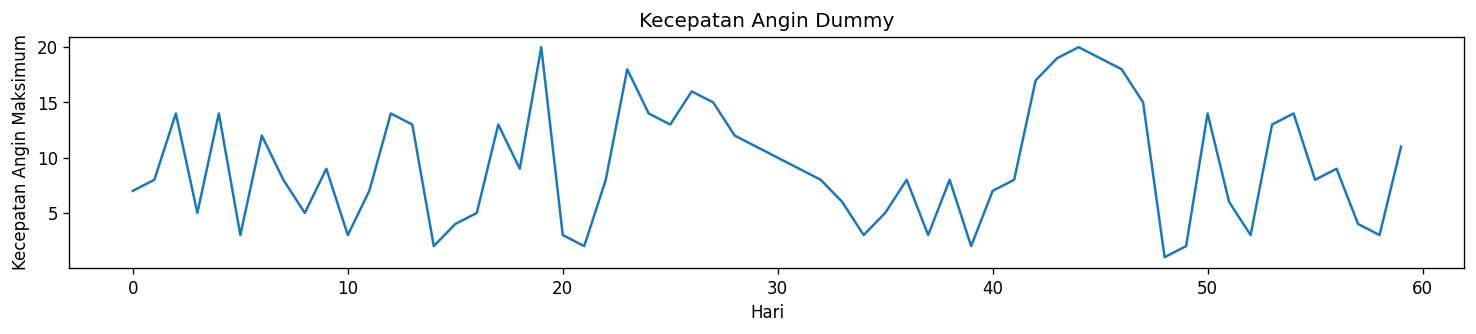

In [4]:
dummy_kec_angin = data_dummy['kecepatan_angin']

# Plot dataset dummy
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})
fig, ax = plt.subplots()
plt.plot(dummy_kec_angin)

ax.set_xlabel('Hari')
ax.set_ylabel('Kecepatan Angin Maksimum')
ax.set_title('Kecepatan Angin Dummy')

plt.show()

### Uji Statisioner Data Dummy

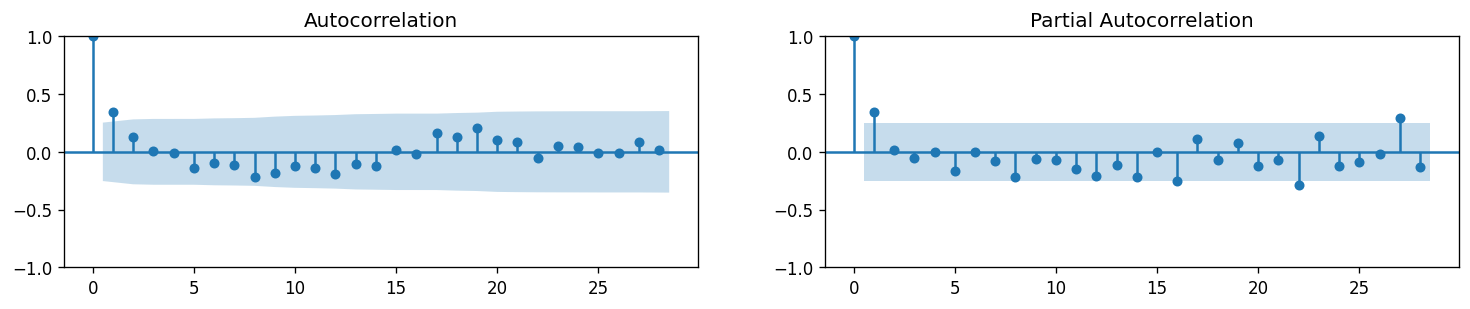

In [5]:
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

plot_acf(dummy_kec_angin, ax=axes[0], lags=28)
plot_pacf(dummy_kec_angin, ax=axes[1], lags=28)

plt.show()

In [6]:
acf_data_dummy = acf(dummy_kec_angin, nlags=28)
pacf_data_dummy = pacf(dummy_kec_angin, nlags=28)

print('\t ACF\t\t PACF')
for idx, (a, p) in enumerate(zip(acf_data_dummy, pacf_data_dummy)):
  print(f'{idx}\t {a:.6f}\t {p:.6f}')

	 ACF		 PACF
0	 1.000000	 1.000000
1	 0.341499	 0.347287
2	 0.132622	 0.018862
3	 0.008692	 -0.050221
4	 -0.006980	 0.002168
5	 -0.143158	 -0.168449
6	 -0.093046	 0.001138
7	 -0.117213	 -0.083523
8	 -0.220005	 -0.220336
9	 -0.180561	 -0.060608
10	 -0.120374	 -0.069072
11	 -0.140788	 -0.151559
12	 -0.190241	 -0.209934
13	 -0.106941	 -0.111456
14	 -0.118662	 -0.217495
15	 0.015211	 0.000574
16	 -0.021599	 -0.251748
17	 0.164428	 0.109899
18	 0.131173	 -0.070414
19	 0.203213	 0.075326
20	 0.104175	 -0.120055
21	 0.086132	 -0.068065
22	 -0.052417	 -0.289787
23	 0.051034	 0.134439
24	 0.039510	 -0.123862
25	 -0.011919	 -0.085281
26	 -0.007639	 -0.015357
27	 0.088503	 0.290514
28	 0.012380	 -0.134097


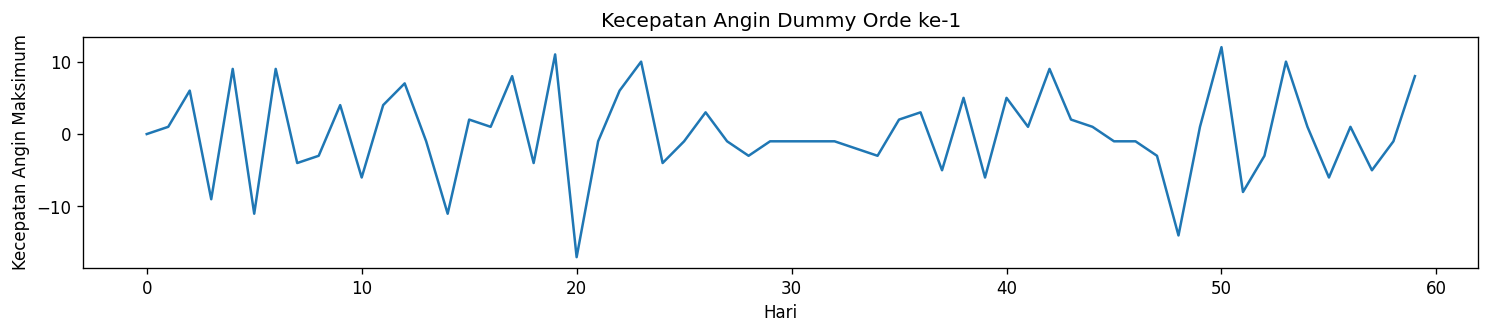

In [7]:
dummy_kec_angin_orde_1 = dummy_kec_angin.diff().fillna(0)

# Plot dataset dummy
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})
fig, ax = plt.subplots()
plt.plot(dummy_kec_angin_orde_1)

ax.set_xlabel('Hari')
ax.set_ylabel('Kecepatan Angin Maksimum')
ax.set_title('Kecepatan Angin Dummy Orde ke-1')

plt.show()

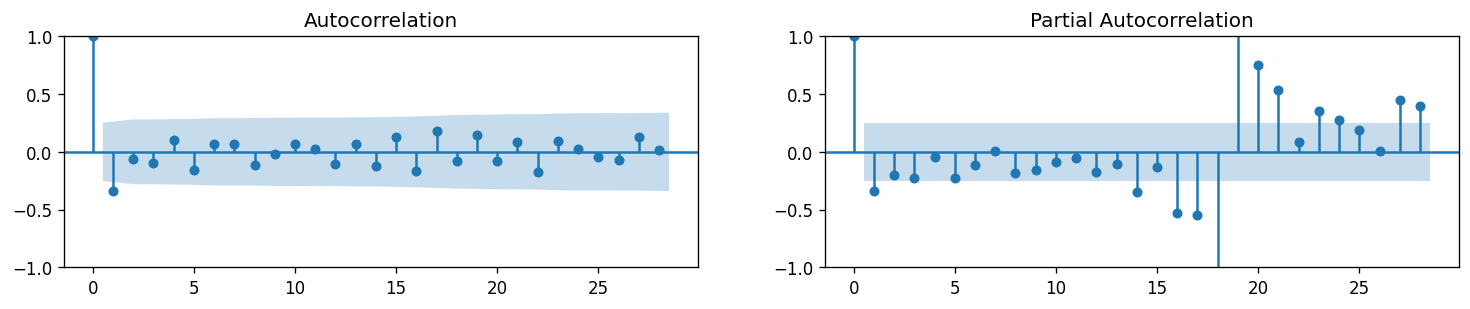

In [8]:
plt.rcParams.update({'figure.figsize':(15,2.5), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)

plot_acf(dummy_kec_angin_orde_1, ax=axes[0], lags=28)
plot_pacf(dummy_kec_angin_orde_1, ax=axes[1], lags=28)

plt.show()

In [9]:
acf_data_dummy = acf(dummy_kec_angin_orde_1, nlags=28)
pacf_data_dummy = pacf(dummy_kec_angin_orde_1, nlags=28)

print('\t ACF\t\t PACF')
for idx, (a, p) in enumerate(zip(acf_data_dummy, pacf_data_dummy)):
  print(f'{idx}\t {a:.6f}\t {p:.6f}')

	 ACF		 PACF
0	 1.000000	 1.000000
1	 -0.335514	 -0.341200
2	 -0.059060	 -0.200902
3	 -0.095621	 -0.229074
4	 0.101992	 -0.040785
5	 -0.158114	 -0.226394
6	 0.066542	 -0.113435
7	 0.063499	 0.009748
8	 -0.113791	 -0.185353
9	 -0.017906	 -0.157936
10	 0.064336	 -0.084427
11	 0.027142	 -0.054470
12	 -0.104614	 -0.176195
13	 0.068967	 -0.108447
14	 -0.123530	 -0.350941
15	 0.130880	 -0.134263
16	 -0.168526	 -0.530384
17	 0.176681	 -0.546981
18	 -0.077582	 -1.350870
19	 0.142767	 3.198146
20	 -0.075388	 0.750779
21	 0.086087	 0.531519
22	 -0.174440	 0.085960
23	 0.094364	 0.352079
24	 0.028802	 0.274822
25	 -0.041729	 0.188075
26	 -0.068955	 0.006930
27	 0.128929	 0.447201
28	 0.015935	 0.396724


### Mencari Paramater ARIMA Terbaik

In [10]:
# Cari paramater terbaik untuk data dummy
p_max = 5
d_max = 1
q_max = 5

mape_terendah = float('inf')
paramater_terbaik = None

for p in range(p_max + 1):
    for d in range(d_max + 1):
        for q in range(q_max + 1):
            paramater = (p, d, q)
            try:
                mape = evaluasi_model_arima(dummy_kec_angin, paramater)
                if mape < mape_terendah:
                    mape_terendah = mape
                    paramater_terbaik = paramater
                print(f'ARIMA{paramater} MAPE: {mape}')
            except:
                continue

print(f'Paramater terbaik: {paramater_terbaik}')

ARIMA(0, 0, 0) MAPE: 3.8624839583672355
ARIMA(0, 0, 1) MAPE: 3.8014226406031777
ARIMA(0, 0, 2) MAPE: 3.895750487644618
ARIMA(0, 0, 3) MAPE: 3.896406218347772
ARIMA(0, 0, 4) MAPE: 3.7326329152898357
ARIMA(0, 0, 5) MAPE: 3.9647867548223803
ARIMA(0, 1, 0) MAPE: 2.6027386964886965
ARIMA(0, 1, 1) MAPE: 1.8308075406502835
ARIMA(0, 1, 2) MAPE: 2.225266681963026
ARIMA(0, 1, 3) MAPE: 2.2547338987472627
ARIMA(0, 1, 4) MAPE: 2.096403712520748
ARIMA(0, 1, 5) MAPE: 2.6496056885277075
ARIMA(1, 0, 0) MAPE: 3.8897059486240946
ARIMA(1, 0, 1) MAPE: 3.997039823615415
ARIMA(1, 0, 2) MAPE: 3.757156670990664
ARIMA(1, 0, 3) MAPE: 3.7691304606891083
ARIMA(1, 0, 4) MAPE: 3.927176479265336
ARIMA(1, 0, 5) MAPE: 3.356392325946395
ARIMA(1, 1, 0) MAPE: 2.2812031922839537
ARIMA(1, 1, 1) MAPE: 2.1724818871337934
ARIMA(1, 1, 2) MAPE: 2.032787798743574
ARIMA(1, 1, 3) MAPE: 2.11425468209915
ARIMA(1, 1, 4) MAPE: 2.044959832991248
ARIMA(1, 1, 5) MAPE: 1.9951661577610535
ARIMA(2, 0, 0) MAPE: 4.050676448284533
ARIMA(2, 0, 1

In [11]:
# Membuat model ARIMA dari dataset dummy
model = ARIMA(dummy_kec_angin, order=paramater_terbaik)
model_fit = model.fit()

In [12]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        kecepatan_angin   No. Observations:                   60
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -179.103
Date:                Fri, 07 Jul 2023   AIC                            372.206
Time:                        08:56:54   BIC                            386.748
Sample:                             0   HQIC                           377.882
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8077      0.215     -3.753      0.000      -1.229      -0.386
ar.L2         -0.5119      0.197     -2.601      0.009      -0.898      -0.126
ar.L3          0.2233      0.176      1.269      0.204      -0.122       0.568
ma.L1          0.2558   1.03e+04   2.47e-05      1.000   -2.03e+04    2.03e+04
ma.L2         -0.2566    1.3e+04  -1.98e-05      1.000   -2.55e+04    2.55e+04
ma.L3         -0.9992   1.03e+04  -9.67e-05      1.000   -2.03e+04    2.03e+04
sigma2        22.7821   2.36e+05   9.67e-05      1.000   -4.62e+05    4.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.78   Prob(JB):                         0.43
Heteroskedasticity (H):               0.95   Skew:                            -0.12
Prob(H) (two-sided):                  0.91   Kurtosis:                         2.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

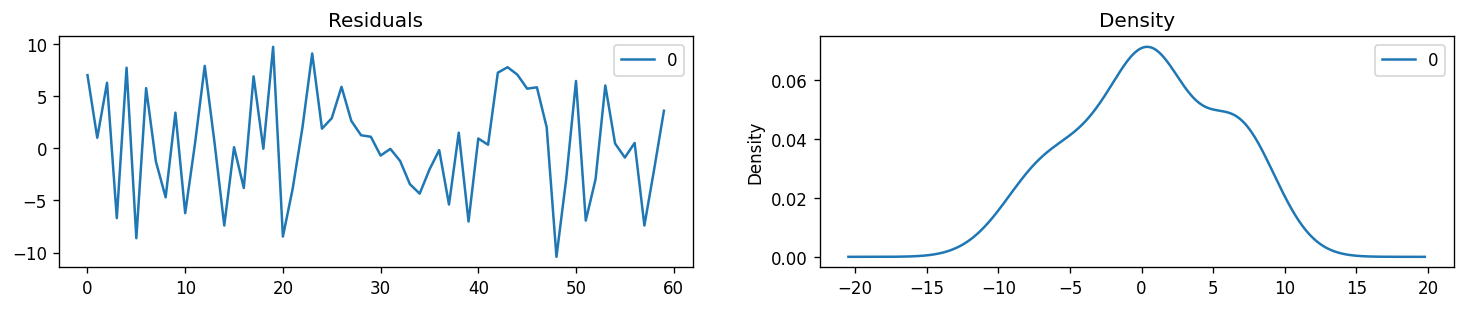

In [13]:
# Plot galat residual
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15,2.5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

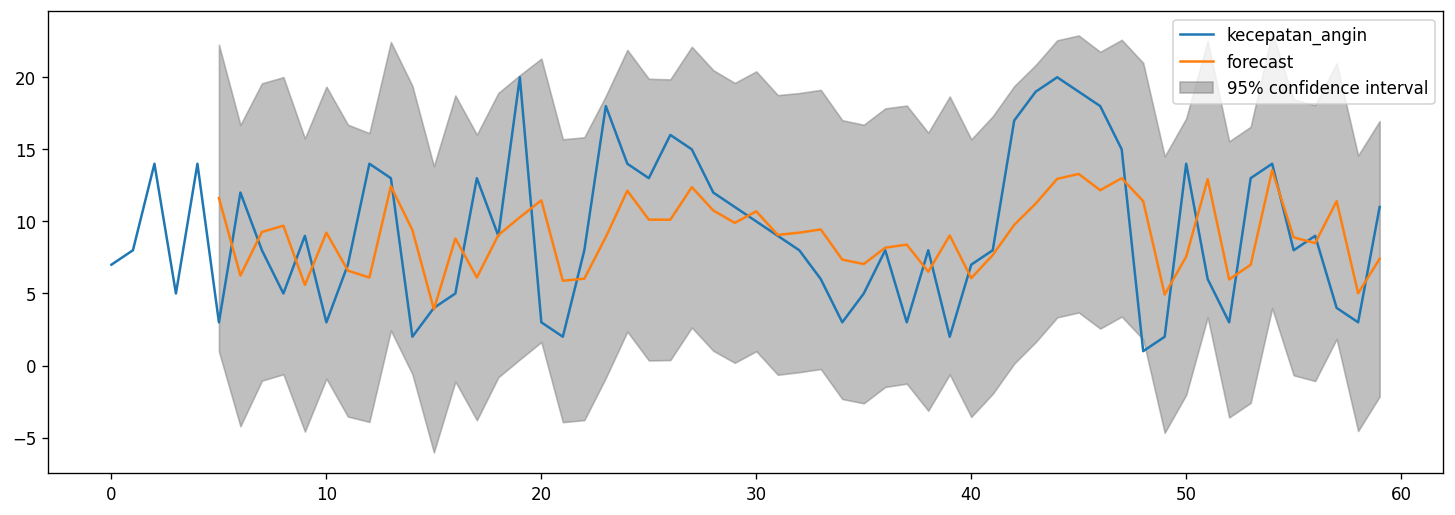

In [14]:
fig, ax = plt.subplots(figsize=(15,5))
ax = dummy_kec_angin.plot(ax=ax)
fig = plot_predict(model_fit, start=5, dynamic=False, ax=ax, plot_insample=False)
plt.show()

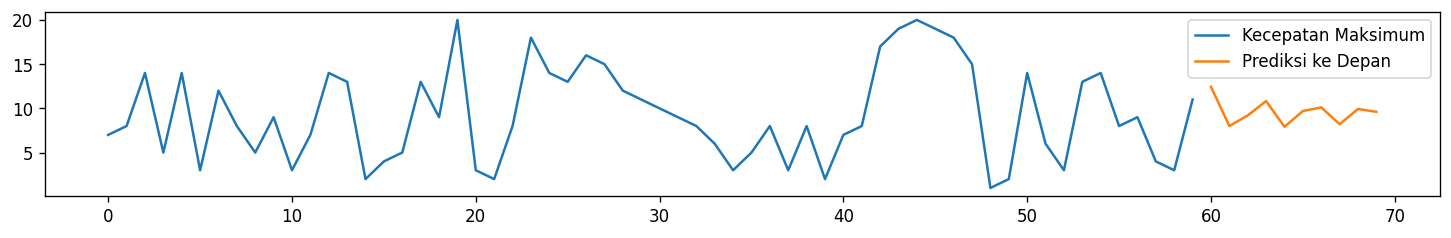

In [15]:
prediksi = model_fit.forecast(steps=10)

fig, ax = plt.subplots(figsize=(15,2))
dummy_kec_angin.plot(ax=ax, label="Kecepatan Maksimum")
prediksi.plot(ax=ax, label="Prediksi ke Depan")
plt.legend()
plt.show()

### Validasi Model ARIMA

## Pengujian Model dengan Data Nyata

### Buka Dataset

In [16]:
# Buka dataset
df_kecepatan_angin = pd.read_csv('https://raw.githubusercontent.com/shamankares/prediksi-kecepatan-angin-TPI-ARIMA/main/kecepatan_angin_tpi_2022.csv',
                                 delimiter=';'
                                )
df_kecepatan_angin

,tanggal,kecepatan_maksimum
0,01/01/2022,4
1,02/01/2022,3
2,03/01/2022,3
3,04/01/2022,6
4,05/01/2022,7
...,...,...
361,28/12/2022,6
362,29/12/2022,8
363,30/12/2022,10
364,31/12/2022,13


In [17]:
df_kecepatan_angin['kecepatan_maksimum'].describe()

count    366.000000
mean       5.838798
std        1.854642
min        3.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       15.000000
Name: kecepatan_maksimum, dtype: float64

In [18]:
# Konversi tipe data kolom tanggal menjadi tipe data datetime
df_kecepatan_angin['tanggal'] = pd.to_datetime(df_kecepatan_angin['tanggal'], dayfirst=True)

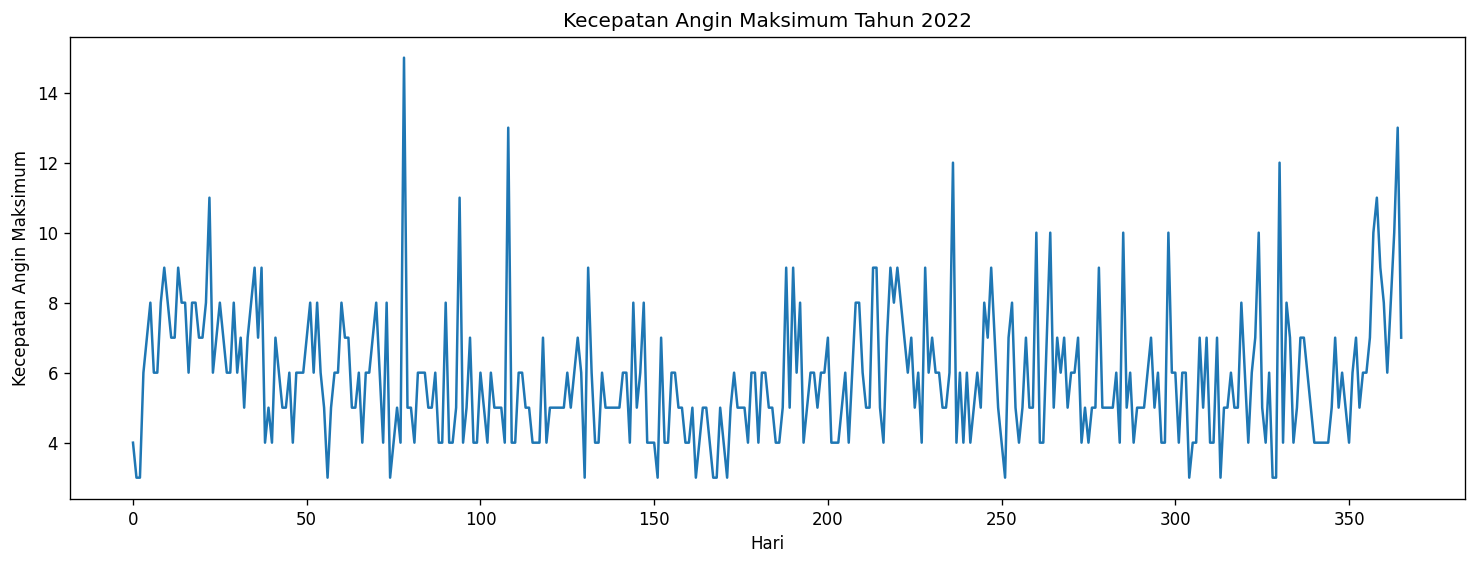

In [19]:
kecepatan_angin = df_kecepatan_angin['kecepatan_maksimum']

# Plot dataset
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(kecepatan_angin)

ax.set_xlabel('Hari')
ax.set_ylabel('Kecepatan Angin Maksimum')
ax.set_title('Kecepatan Angin Maksimum Tahun 2022')

plt.show()

### Uji Statisioner Data

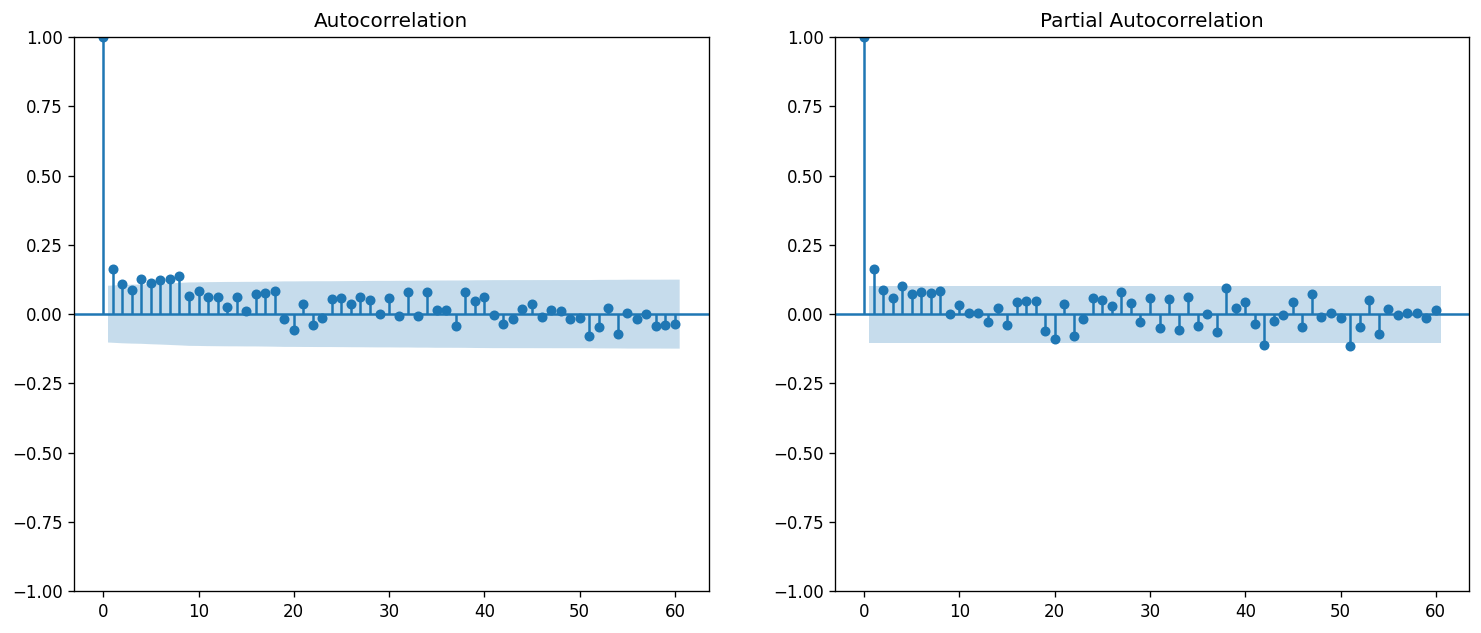

In [20]:
# Plot nilai ACF dan PACF dataset
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plot_acf(kecepatan_angin, ax=ax[0], lags=60)
plot_pacf(kecepatan_angin, ax=ax[1], lags=60)

plt.show()

In [21]:
acf_data_real = acf(kecepatan_angin, nlags=60)
pacf_data_real = pacf(kecepatan_angin, nlags=60)

print('\t ACF\t\t PACF')
for idx, (a, p) in enumerate(zip(acf_data_real, pacf_data_real)):
  print(f'{idx}\t {a:.6f}\t {p:.6f}')

	 ACF		 PACF
0	 1.000000	 1.000000
1	 0.162187	 0.162632
2	 0.109880	 0.086318
3	 0.085836	 0.058047
4	 0.126180	 0.100851
5	 0.111694	 0.071765
6	 0.123107	 0.080995
7	 0.125091	 0.077851
8	 0.136376	 0.083552
9	 0.065493	 -0.000045
10	 0.084074	 0.032073
11	 0.060698	 0.003275
12	 0.061346	 0.004659
13	 0.024686	 -0.029495
14	 0.062384	 0.020532
15	 0.009537	 -0.040189
16	 0.072440	 0.044893
17	 0.075734	 0.046755
18	 0.084218	 0.047771
19	 -0.018680	 -0.062609
20	 -0.057986	 -0.089868
21	 0.036777	 0.037710
22	 -0.040505	 -0.079493
23	 -0.013033	 -0.017837
24	 0.054109	 0.057116
25	 0.058996	 0.051043
26	 0.035877	 0.028731
27	 0.062141	 0.078936
28	 0.050172	 0.039904
29	 -0.000953	 -0.028926
30	 0.057582	 0.059438
31	 -0.006030	 -0.048476
32	 0.078507	 0.054993
33	 -0.005146	 -0.057695
34	 0.079673	 0.060625
35	 0.015136	 -0.043652
36	 0.016349	 0.001046
37	 -0.042356	 -0.065348
38	 0.081081	 0.093941
39	 0.047864	 0.022060
40	 0.060176	 0.042343
41	 -0.003179	 -0.034141
42	 -0.03

Berdasarkan grafik tersebut, karena data tersebut menunjukkan penurunan secara lamban, maka data kecepatan angin maksimum perlu di-_differencing_ (menghitung selisih antardata).

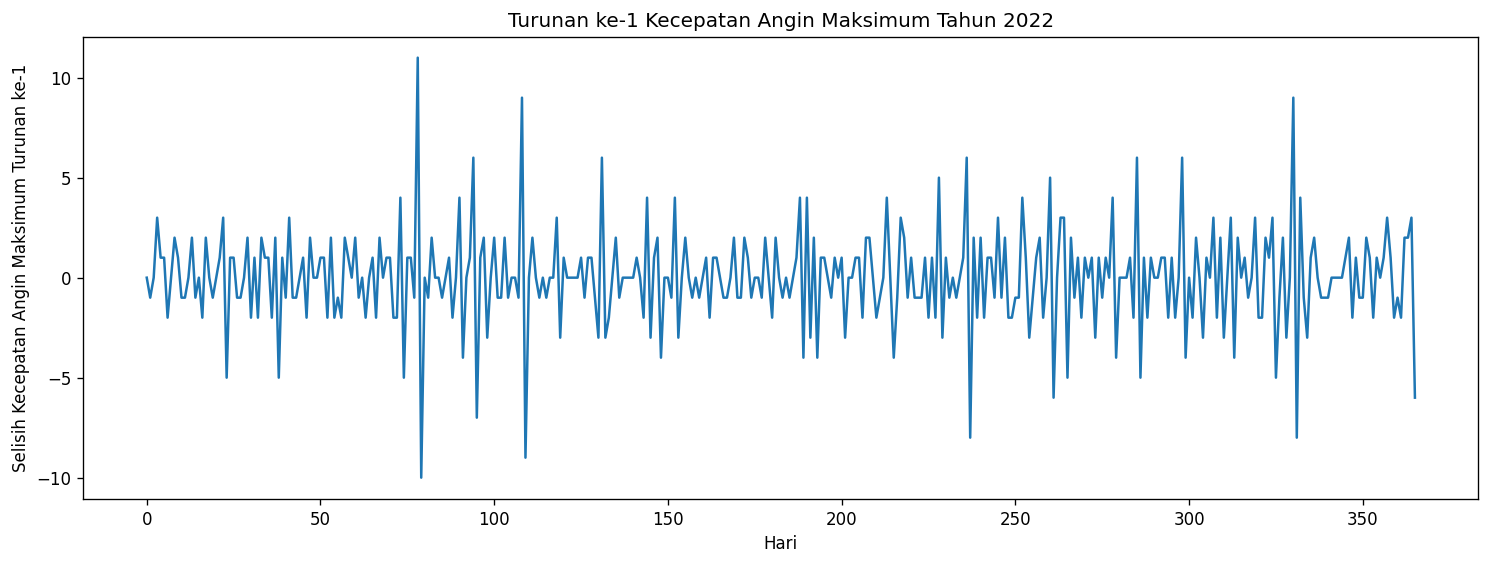

In [22]:
kecepatan_angin_orde_1 = kecepatan_angin.diff().fillna(0)

# Plot dataset turunan ke-1
fig, ax = plt.subplots(figsize=(15, 5))
plt.plot(kecepatan_angin_orde_1)

ax.set_xlabel('Hari')
ax.set_ylabel('Selisih Kecepatan Angin Maksimum Turunan ke-1')
ax.set_title('Turunan ke-1 Kecepatan Angin Maksimum Tahun 2022')

plt.show()

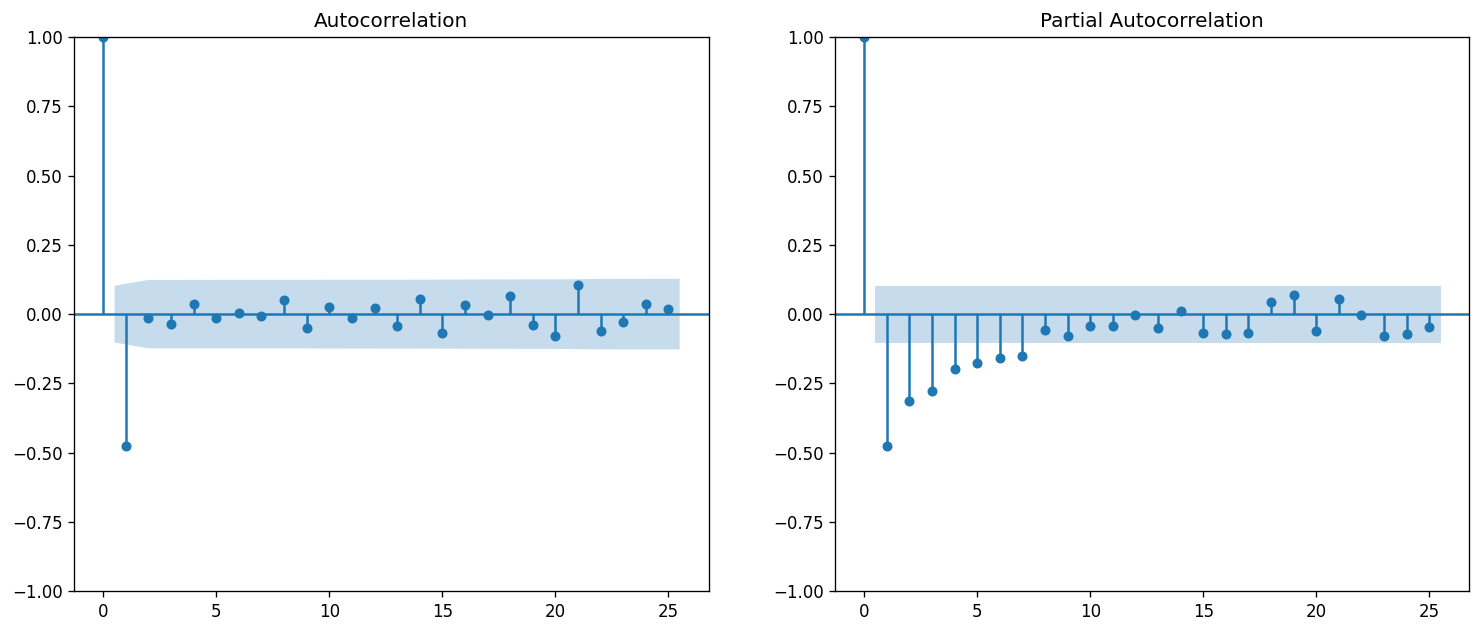

In [23]:
# Plot nilai ACF dan PACF dari turunan ke-1
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

plot_acf(kecepatan_angin_orde_1, ax=ax[0], lags=25)
plot_pacf(kecepatan_angin_orde_1, ax=ax[1], lags=25)

plt.show()

### Melatih Model ARIMA

In [24]:
# Menentukan paramater terbaik untuk dataset
p_max = 5
d_max = 1
q_max = 5

mape_terendah = float('inf')
paramater_terbaik = None

for p in range(p_max + 1):
    for d in range(d_max + 1):
        for q in range(q_max + 1):
            paramater = (p, d, q)
            try:
                mape = evaluasi_model_arima(kecepatan_angin, paramater)
                if mape < mape_terendah:
                    mape_terendah = mape
                    paramater_terbaik = paramater
                print(f'ARIMA{paramater} MAPE: {mape}')
            except:
                continue

print(f'Paramater terbaik: {paramater_terbaik}')

ARIMA(0, 0, 0) MAPE: 1.1704400798130299
ARIMA(0, 0, 1) MAPE: 1.1738590973917697
ARIMA(0, 0, 2) MAPE: 1.1760190723272081
ARIMA(0, 0, 3) MAPE: 1.175407500515116
ARIMA(0, 0, 4) MAPE: 1.1755453122468684
ARIMA(0, 0, 5) MAPE: 1.1744348196618297
ARIMA(0, 1, 0) MAPE: 0.5761799011799013
ARIMA(0, 1, 1) MAPE: 0.3281366908511229
ARIMA(0, 1, 2) MAPE: 0.26371667991178305
ARIMA(0, 1, 3) MAPE: 0.2644433127114246
ARIMA(0, 1, 4) MAPE: 0.266571600669909
ARIMA(0, 1, 5) MAPE: 0.27015793694048973
ARIMA(1, 0, 0) MAPE: 1.173217721237537
ARIMA(1, 0, 1) MAPE: 1.1426202572385868
ARIMA(1, 0, 2) MAPE: 1.139384236551031
ARIMA(1, 0, 3) MAPE: 1.1366747090035403
ARIMA(1, 0, 4) MAPE: 1.136711690164229
ARIMA(1, 0, 5) MAPE: 1.1324596082215437
ARIMA(1, 1, 0) MAPE: 0.43451583240459074
ARIMA(1, 1, 1) MAPE: 0.30092689647407295
ARIMA(1, 1, 2) MAPE: 0.26419334375727377
ARIMA(1, 1, 3) MAPE: 0.26014146322989623
ARIMA(1, 1, 4) MAPE: 0.2608603453429658
ARIMA(1, 1, 5) MAPE: 0.2626179531712422
ARIMA(2, 0, 0) MAPE: 1.1751262886257372

In [25]:
model = ARIMA(kecepatan_angin, order=paramater_terbaik)
model_fit = model.fit()

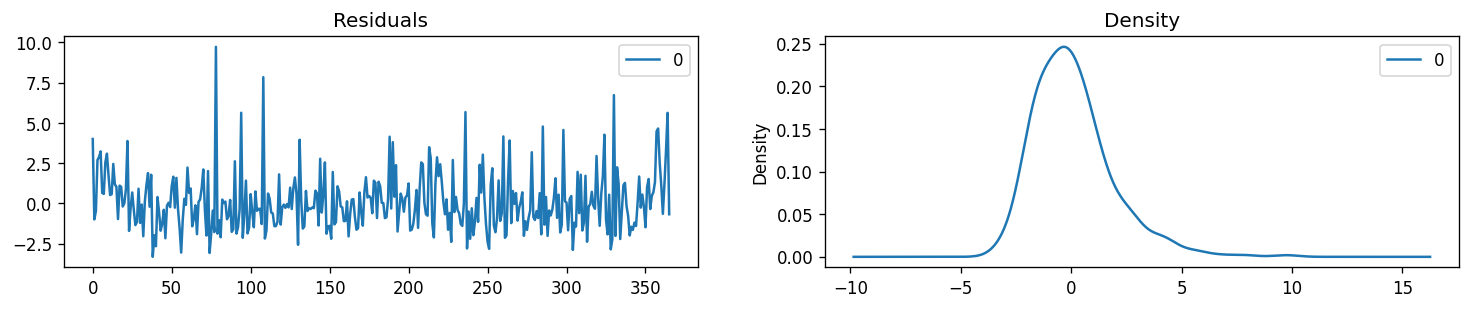

In [26]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(15,2.5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

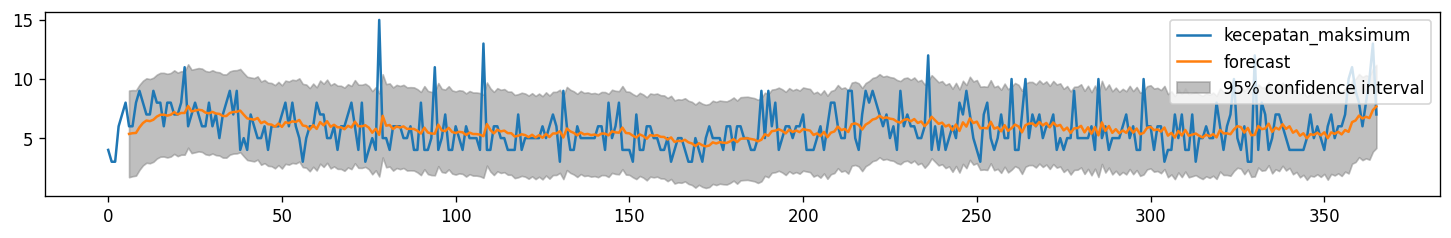

In [27]:
# Actual vs Fitted
fig, ax = plt.subplots(figsize=(15,2))
ax = kecepatan_angin.plot(ax=ax)
fig = plot_predict(model_fit, start=6, dynamic=False, ax=ax, plot_insample=False)
plt.show()

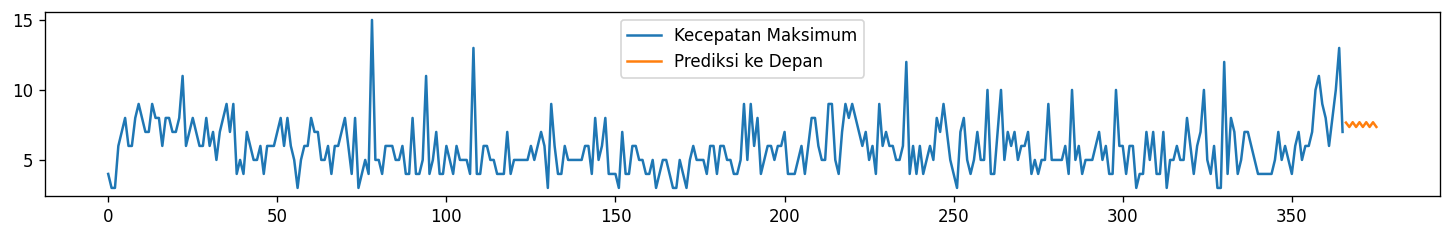

In [28]:
prediksi = model_fit.forecast(steps=10)

fig, ax = plt.subplots(figsize=(15,2))
kecepatan_angin.plot(ax=ax, label="Kecepatan Maksimum")
prediksi.plot(ax=ax, label="Prediksi ke Depan")
plt.legend()
plt.show()

### Validasi Model ARIMA

In [29]:
# Validasi menggunakan MAPE

In [30]:
#print('=== MAE ===')

#for p in range(4):
#    for d in range(2):
#        for q in range(4):
#            olah_kecepatan_angin = kecepatan_angin
#            if d > 0:
#                for _ in range(d):
#                    olah_kecepatan_angin = olah_kecepatan_angin.diff().fillna(0)
#
#            model = ARIMA(olah_kecepatan_angin, order=(p, d, q))
#            model_fitted = model.fit()
#            mae = mean_absolute_error(model_fit.predict(start=5, end=365), olah_kecepatan_angin[5:])
#            print(f'ARIMA({p}, {d}, {q}): {mae}')